In [2]:
# import required libraries
import pandas as pd
import numpy as np
from statistics import mode

### Download the file "data_statistics.csv".

In [3]:
# read data_python.csv using pandas
mydata = pd.read_csv("data_statistics.csv")

In [4]:
# print first few rows of mydata
mydata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


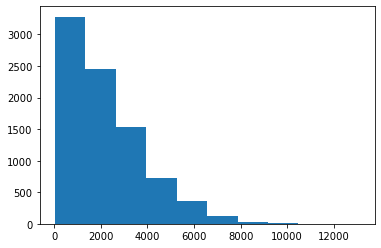

In [5]:
import matplotlib.pyplot as plt
plt.hist(mydata['Item_Outlet_Sales'])
plt.show()

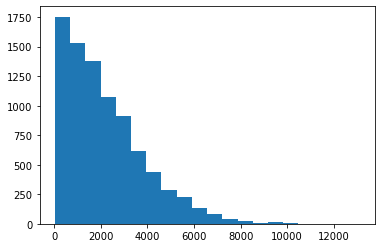

In [8]:
# increadse no. of bins to 20
plt.hist(mydata['Item_Outlet_Sales'], bins=20)
plt.show()

In [13]:
# find mean and median of 'Item_Weight'
np.mean(mydata['Item_MRP']), np.median(mydata['Item_MRP'])

(140.9927819781767, 143.0128)

In [11]:
#Finding The Outliars in Price
print(mydata['Item_MRP'].quantile(0.25))
print(mydata['Item_MRP'].quantile(0.5))
print(mydata['Item_MRP'].quantile(0.75))
print(mydata['Item_MRP'].quantile(1))

93.8265
143.0128
185.6437
266.8884


In [18]:
#No Outliars found in MRP

<AxesSubplot:>

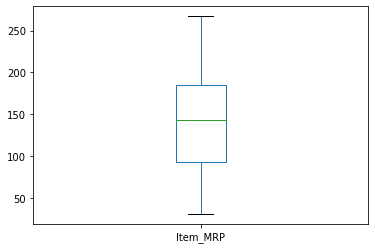

In [19]:
mydata['Item_MRP'].plot(kind='box') #Plotting Box plot of Item_MRP

In [21]:
# find mode of 'Outlet_Size'
mydata['Outlet_Size'].mode()

0    Medium
dtype: object

In [22]:
# frequency table of 'Outlet_Type'
mydata['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
# mean of 'Item_Outlet_Sales' for 'Supermarket Type2' outlet type
np.mean(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type2'])


1995.498739224138

In [24]:
# mean of 'Item_Outlet_Sales' for 'Supermarket Type3' outlet type
np.mean(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type3'])

3694.038557647059

In [26]:
# mean of 'Item_Outlet_Sales' for 'Grocery Store' outlet type
np.mean(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Grocery Store'])

339.8285004616805

In [27]:
# mean of 'Item_Outlet_Sales' for 'Supermarket Type1' outlet type
np.mean(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type1'])

2316.181148108302

In [25]:
mydata.corr() #Checking the correlation of between variables

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<h3 style="color:skyblue">Here we can see the the <b>Item_Mrp</b> have the highest Correlation with <b>Item_Outlet_Sales</b> </h3>
<h4 style="color:skyblue">Now that we have find the means of <b>Item_Outlet_Sales</b> for each of <b>the Outlet_Types</b> Now lets do the 2 Sample T test for Outlet_Types</h4>

In [29]:
# 2 sample independent t-test 
from scipy import stats
stats.ttest_ind(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type2'], mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type3'])

Ttest_indResult(statistic=-20.442923116350805, pvalue=5.856140005446105e-84)

In [30]:
stats.ttest_ind(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type1'], mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Grocery Store'])

Ttest_indResult(statistic=42.777859363653086, pvalue=0.0)

In [31]:
stats.ttest_ind(mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type1'], mydata['Item_Outlet_Sales'][mydata['Outlet_Type'] == 'Supermarket Type2'])

Ttest_indResult(statistic=6.043111756421072, pvalue=1.5953321868340391e-09)

<h2 style="color:red">According to above P values of Two sample T test we can safely Reject Null Hypothesis and can say that the sales significantly changes as the change in Outlet_types</h2>